## 数学上曲线某一处的斜率等于某点前后两点连线的斜率，计算机可以模拟该过程
### 对每一个微分量进行相应的求解 速度慢 但是可以作为正确结果推导数学上梯度的表达式

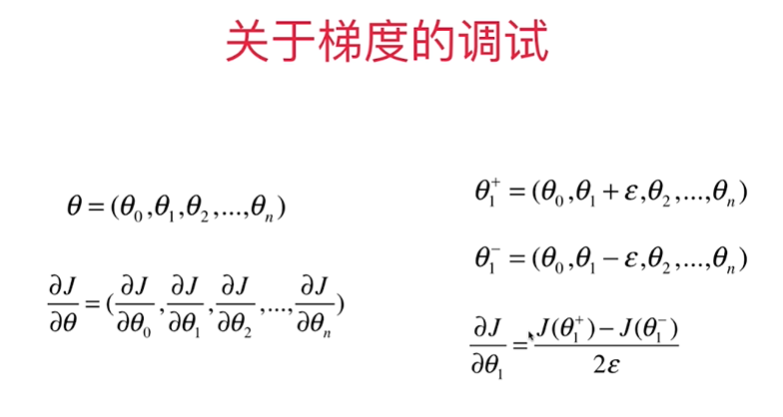

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
X = np.random.random(size=(1000, 10))

In [3]:
true_theta = np.arange(1, 12, dtype=float)

In [4]:
X_b = np.hstack([np.ones((len(X), 1)), X])

In [5]:
y = X_b.dot(true_theta) + np.random.normal(size=1000)

In [6]:
X.shape

(1000, 10)

In [7]:
y.shape

(1000,)

In [8]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float('inf')

In [9]:
def dJ_math(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

In [10]:
def dJ_debug(theta, X_b, y, epsilon=0.0001):
    res = np.empty(len(theta))
    for i in range(len(theta)):
        theta_1 = theta.copy()
        theta_1[i] += epsilon
        theta_2 = theta.copy()
        theta_2[i] -= epsilon
        res[i] = (J(theta_1, X_b, y) - J(theta_2, X_b, y)) / (2 * epsilon)
    return res

In [11]:
def gradient_descent(dJ, X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-6):
    
    theta = initial_theta
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        
        cur_iter =+ 1
        
    return theta

In [12]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

%time theta = gradient_descent(dJ_debug,  X_b, y, initial_theta, eta)
theta

Wall time: 3.17 s


array([ 1.2352741 ,  2.03861875,  2.89098666,  4.09302554,  5.02861985,
        5.88616601,  6.94975899,  7.9832856 ,  8.836721  ,  9.96669651,
       10.88187589])

In [13]:
%time theta = gradient_descent(dJ_math,  X_b, y, initial_theta, eta)
theta

Wall time: 552 ms


array([ 1.2352741 ,  2.03861875,  2.89098666,  4.09302554,  5.02861985,
        5.88616601,  6.94975899,  7.9832856 ,  8.836721  ,  9.96669651,
       10.88187589])